In [9]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import datetime

In [18]:
def get_dtime (string):
    """
    converts strings to datetime objects using datetime.strptime mostly just wrote this so I could .apply() it in pandas
    method chains
    
    takes (string) which is the full date of format mm/dd/yyyy (can't be 2 digit year)
    """
    string = str(string)

    return datetime.datetime.strptime(string, '%Y-%m-%d %H:%M:%S')#'%Y-%m-%d'

In [11]:
def open_hist (filepath, sheet):
    
    hist = pd.read_excel(filepath, sheet_name=sheet)
    
    hist['date'] = hist['date'].apply(get_dtime)
    
#     hist['st close'] = hist['st close'].apply(get_dtime)
#     hist['st open'] = hist['st open'].apply(get_dtime)
    
    return hist

In [12]:
def drop_autopay (hist):
    
    autopays = hist.loc[hist['desc'].str.contains('AUTOMATIC PAYMENT').fillna(False)].index
    
    hist = hist.loc[[u for u in hist.index if u not in autopays], :]
    
    return hist

In [25]:
path = "C:/Users/geeze/Documents/finances/cc/cc_mstr_hist.xlsx"
hist = open_hist(path, 'cc_hist_tidy')

In [21]:
hist_no_auto = drop_autopay(hist)

In [22]:
monthly = hist_no_auto.resample('M', on='date').sum()

In [29]:
from openpyxl import load_workbook
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

monthly.reset_index().to_excel(writer, sheet_name = 'cc_hist_monthly', index=False)


writer.save()
writer.close()

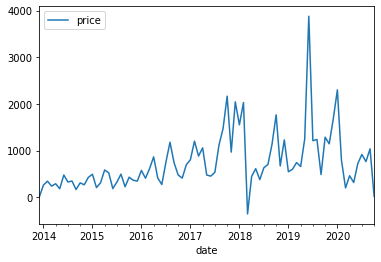

In [30]:
monthly.plot(y='price')

In [31]:
monthly.mean()

price    743.439157
dtype: float64